# Comparison for LogSumExp

The LogSumExp-problem with linear consraints:
	$$\log(1 + \sum\limits_{k=1}^n \exp(\alpha x_k)) + \frac{\beta}{2} \|\textbf{x}\|_2^2 \rightarrow \min_{\textbf{x}\in \mathbb{R}^N}$$
	$$\text{s.t.} (\textbf{b}_j, \textbf{x}) - c_j <= 0, j = 1\dots M$$
	
This problem can be converted into saddle point problem:
	$$\min_{\textbf{x}} \max_{\textbf{y}\in\mathbb{R}^M_+} S(\textbf{x},\textbf{y}),$$
where $S(\textbf{x}, \textbf{y}) = r(\textbf{x})+F(\textbf{x}, \textbf{y}) - h(\textbf{y})$
	$$r(\textbf{x}) = \log(1 + \sum\limits_{k=1}^n \exp(\alpha x_k)) + \frac{\beta}{2} \|\textbf{x}\|_2^2$$
	$$F(\textbf{x}, \textbf{y}) = \sum\limits_{j=1}^M x_j(\textbf{b}_j, \textbf{y}) = (\textbf{x}, B\textbf{y})$$
	$$h(\textbf{y}) = (\textbf{c}, \textbf{y})$$

So N is dimensional of external variable, M - internal. But we will consider the external problem as help problem.

In [1]:
import numpy as np
from TestFunctions import LogSumExp
from TestFunctions.TestFunctions import TestFunction
from Solvers.GradientMethods import FGM_internal
import matplotlib.pyplot as plt
%matplotlib notebook
import comparison
import imp

from comparison import method_comparison, create_methods_dict

In [2]:
def get_LSE(N = 100, M = 2, alpha = 0.001, beta = 0.5e-3, k = 1000):
    """
    The function is to get class of LSE. All parameters mathes the
    parameters above.
    
    N is dimensional of primal problem
    M is number of constraints. It is also the dual dimension
    alpha is parameter of LogSumExp problem
    beta is coefficient of l2-regularization for primal problem
    
    k is parameter for to generate matrix B
    """
    
    B = np.random.uniform(low = -k, high = 0, size = (M, N))
    c = np.ones((M,))
    x_ = np.zeros((N,))
    f_ = LogSumExp.r(alpha, beta).get_value(x_)
    gamma = c.max()
    y_max = f_/gamma
    Q = [[0, y_max] for i in range(M)]
    Q = np.array(Q)
    size_domain = np.linalg.norm(Q[:,0]-Q[:,1])
    LSE = TestFunction(r = LogSumExp.h(c, size_domain = size_domain),
                    F = LogSumExp.F_tilde(B, size_domain),
                    h = LogSumExp.r(alpha, beta, size_domain),
                    solver = FGM_internal, 
                    get_start_point = lambda x: (1/beta * -x.dot(B), alpha * np.sqrt(N)/beta))
    return LSE, Q

In [3]:
def get_plot(history, f, keys = ['Ellipsoids', 'Dichotomy', 'FGM']):
    values = []
    times = []
    for key in keys:
        t0 = history[key][0][1]
        times.append([i[1]-t0 for i in history[key]])
        u = [f(i[0]) for i in history[key]]
        values.append(u)
    m = min(min(values))-1
    for ind, t in enumerate(times):
        plt.plot(t, values[ind]-m)
    plt.legend(keys)
    plt.grid()
    plt.yscale("log")
    plt.xlabel("Time, s")
    plt.ylabel("Values")
    return t, values

## M= 2

In [4]:
M = 2

### N = 100

In [5]:
N = 100

In [6]:
eps = 1e-3

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


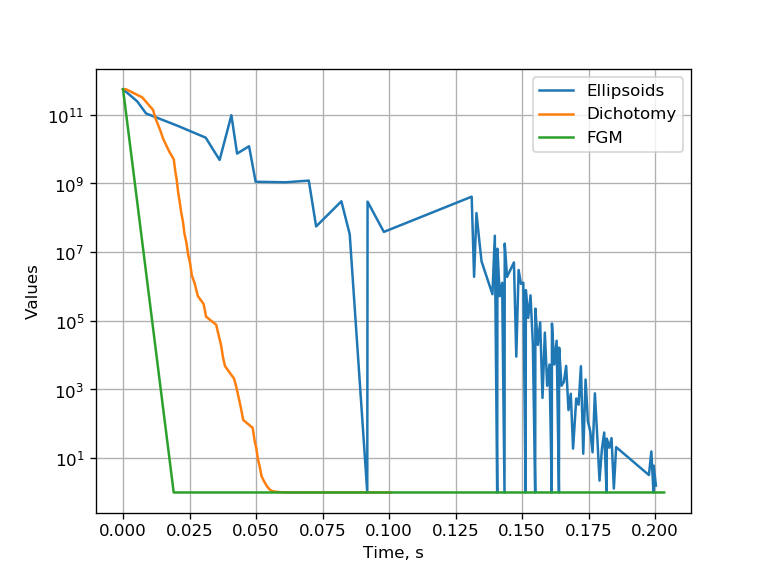

In [7]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [8]:
eps = 1e-6

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


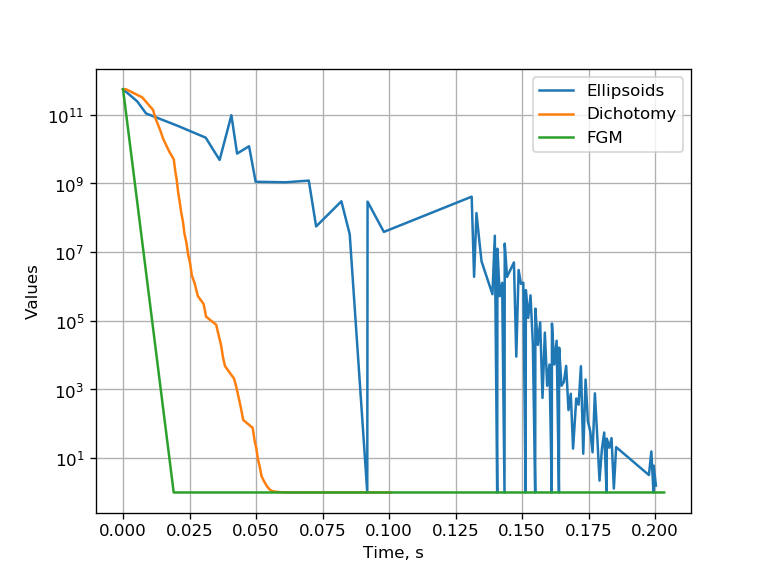

In [8]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [10]:
eps = 1e-9

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


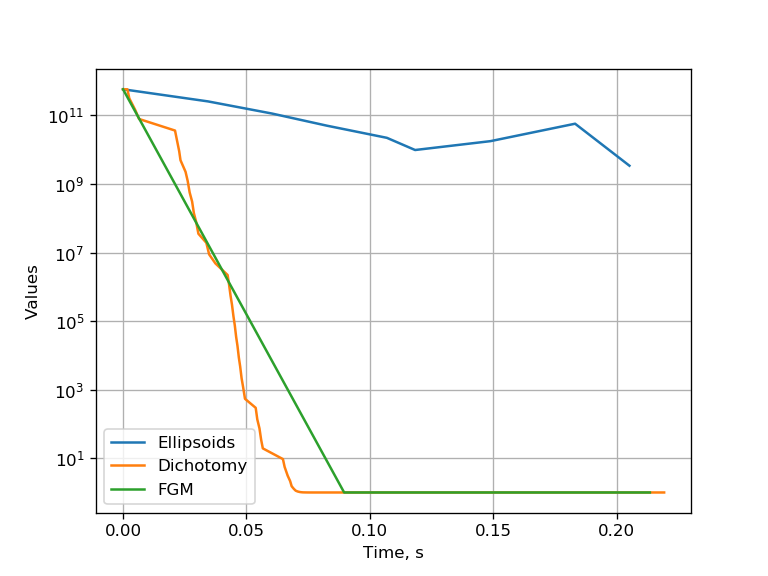

In [11]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

### N = 1000

In [12]:
N = 1000

In [13]:
eps = 1e-3

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


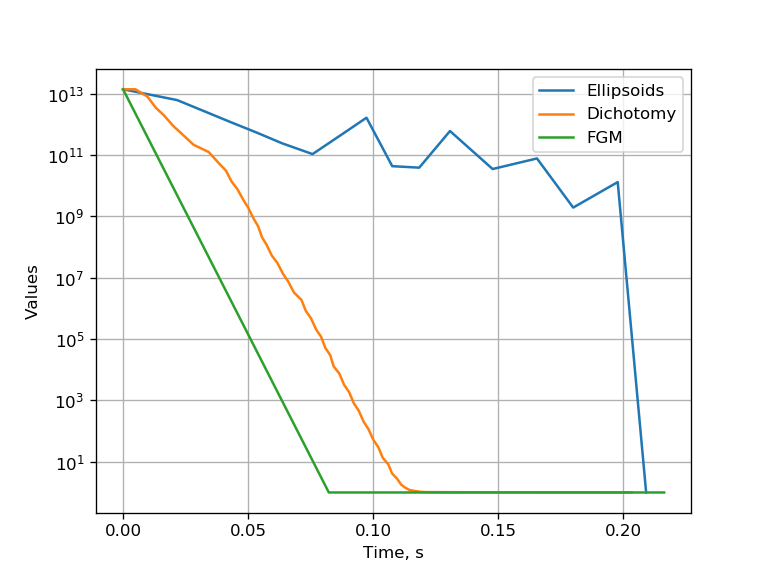

In [14]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [15]:
eps = 1e-6

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


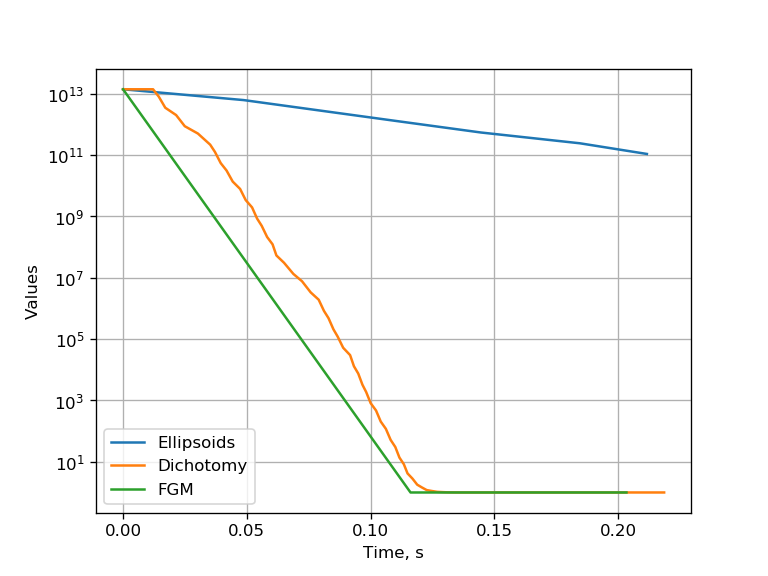

In [16]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [17]:
eps = 1e-9

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


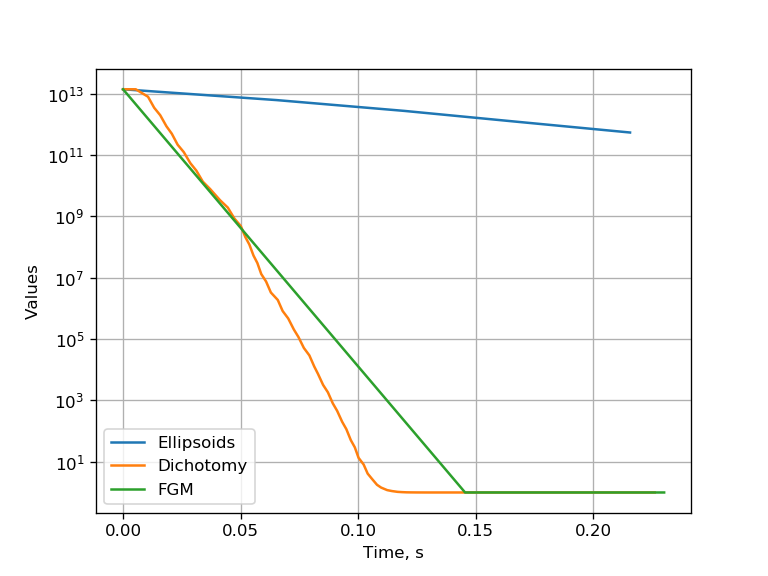

In [18]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

## M= 3

In [19]:
M = 3

### N = 100

In [20]:
N = 100

In [21]:
eps = 1e-6

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


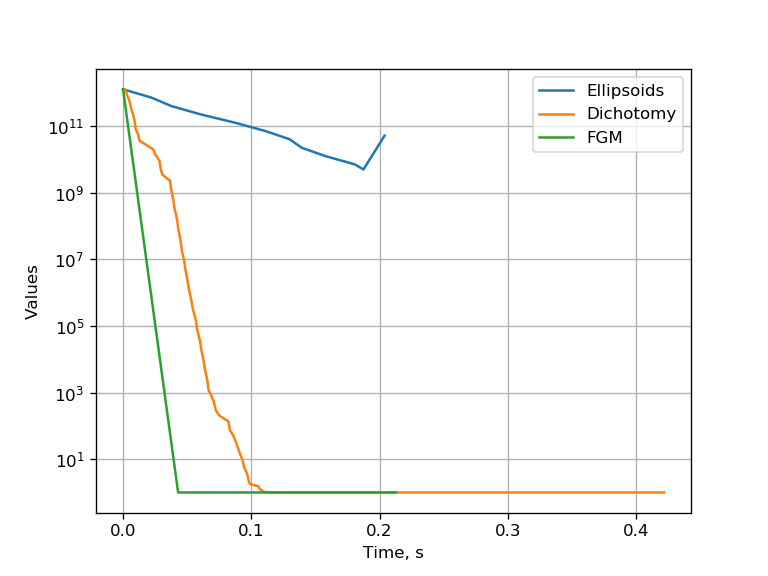

In [22]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [24]:
eps = 1e-12

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


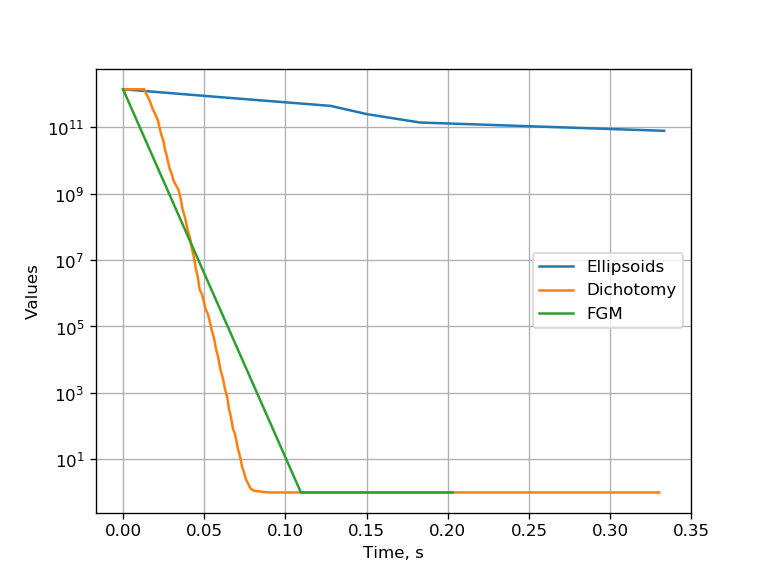

In [25]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [26]:
eps = 1e-18

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


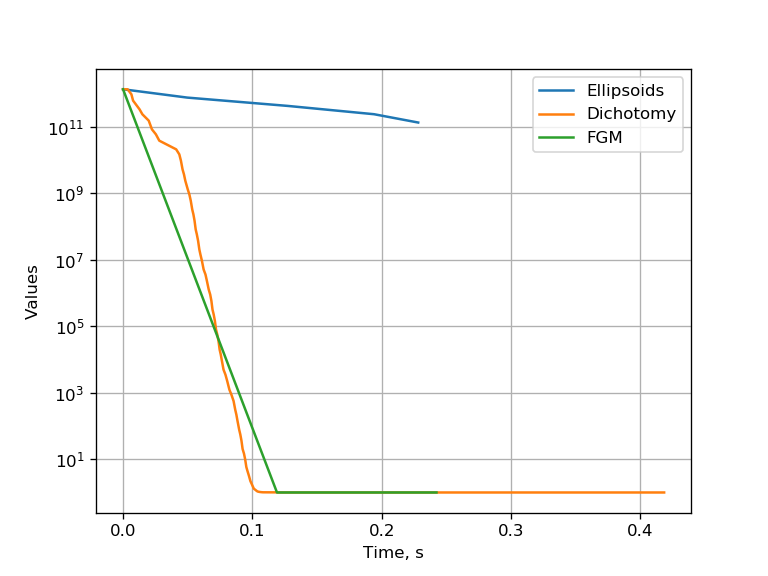

In [27]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

### N = 1000

In [28]:
N = 1000

In [29]:
eps = 1e-6

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.2)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


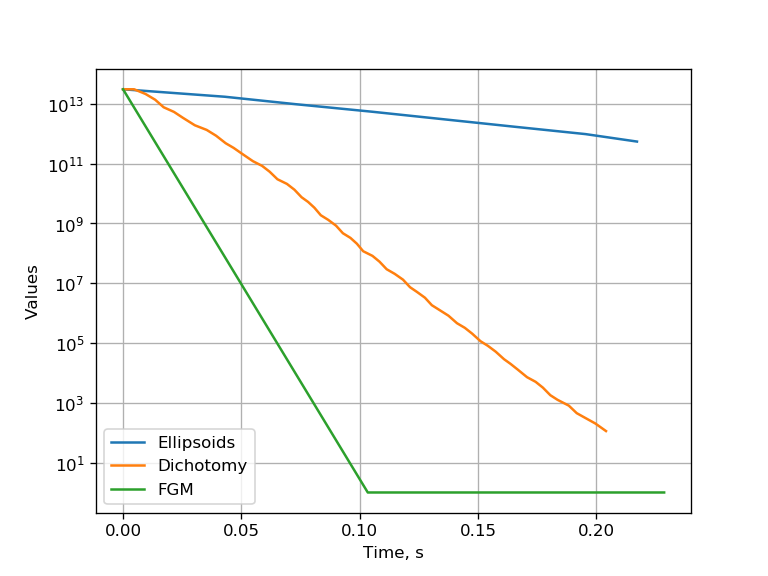

In [30]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [42]:
eps = 1e-12

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.3)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


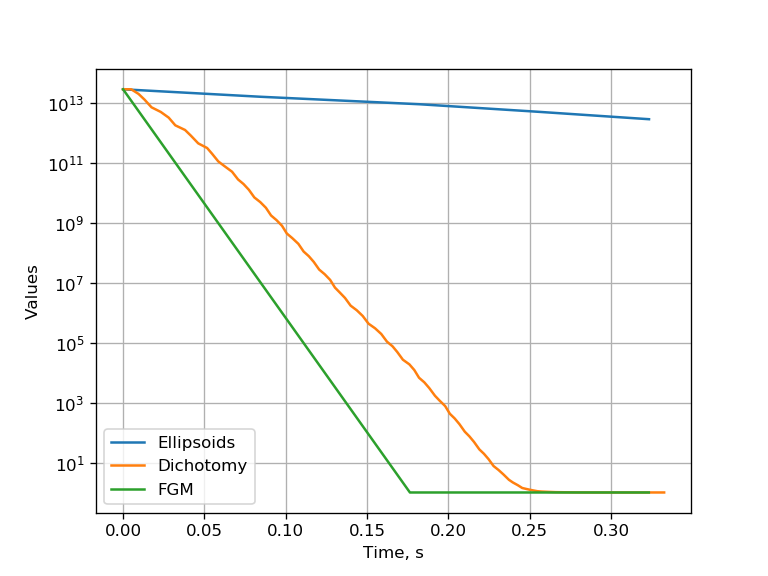

In [43]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)

In [40]:
eps = 1e-18

LSE, Q = get_LSE(N, M)
history = {}
methods = create_methods_dict(LSE, np.mean(Q, axis = 1),
                              np.linalg.norm(Q[:,0]-Q[:,1]),
                              Q, eps, history, time_max = 0.3)
comparison.method_comparison(methods)

<IPython.core.display.Javascript object>


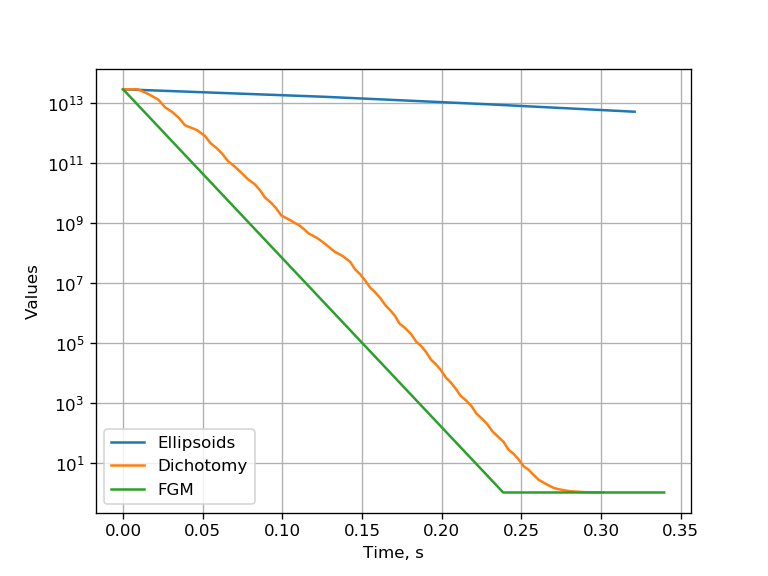

In [41]:
%matplotlib notebook
cond = lambda y, R: LSE.L_xx * R <= 1e-3
f = lambda y: LSE.get_value(y, LSE.get_solution(y, cond)[0])
#f = lambda y: LSE.h.get_value(LSE.get_solution(y, cond)[0])
t, values = get_plot(history, f)
name_fig = str(M)+"_" + str(N) + "_" + str(eps) + ".png"
plt.savefig("Images/" + name_fig)